In [1]:
import os

In [2]:
os.getcwd()

'D:\\idea projects\\pycharm projects\\ature\\notebook'

In [3]:
os.chdir("D:\\idea projects\\pycharm projects\\ature\\")

In [4]:
import preprocess.av.av_utils as av
from preprocess.common.mat_utils import Mat
import preprocess.filter.image_filters as imf
import preprocess.graph.graph_utils as gt
import preprocess.image.image_utils as img
import matplotlib.pyplot as plt
import os
import path_config as pth
import numpy as np
import preprocess.filter.image_filters as fil

In [5]:
# av.show_av_graph(av_data_set=file,av_only=False,onh_show=True,image_show=False)

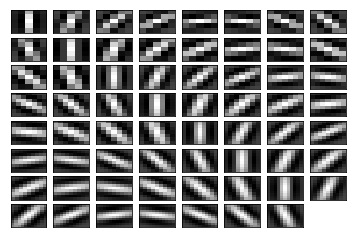

In [6]:
kernels = fil.build_filter_bank(k_size_start=4, k_size_end=11, k_step=1, gamma=0.5)
fil.show_kernels(kernels=kernels, save_fig=False)

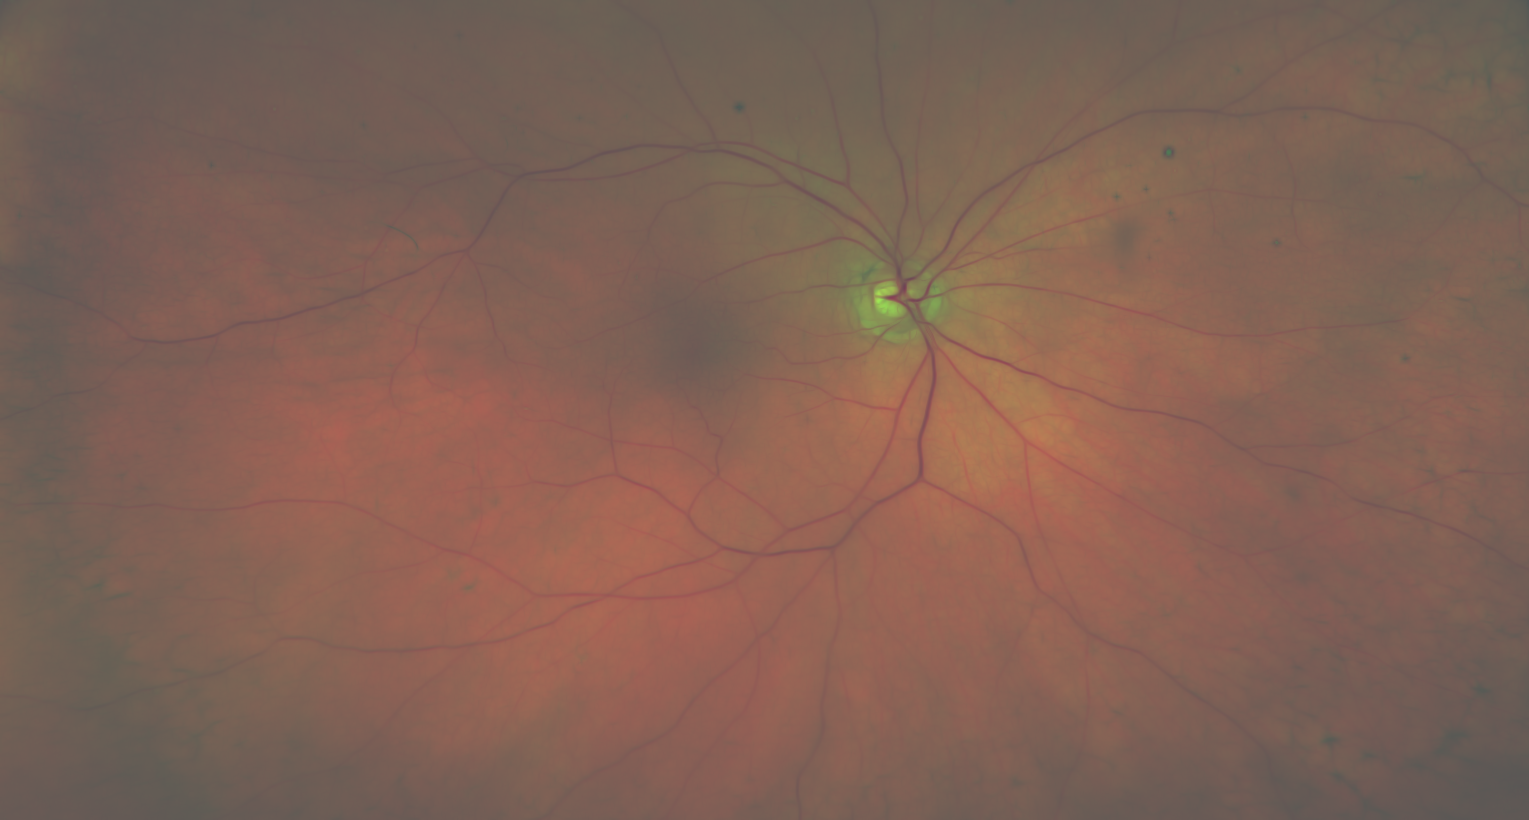

In [10]:
file = Mat(file_name='wide_image_21.mat')
image_array = file.get_image('I2')
final_arr = fil.process(255-image_array[:,:,:], kernels)
img.from_array(255-final_arr)

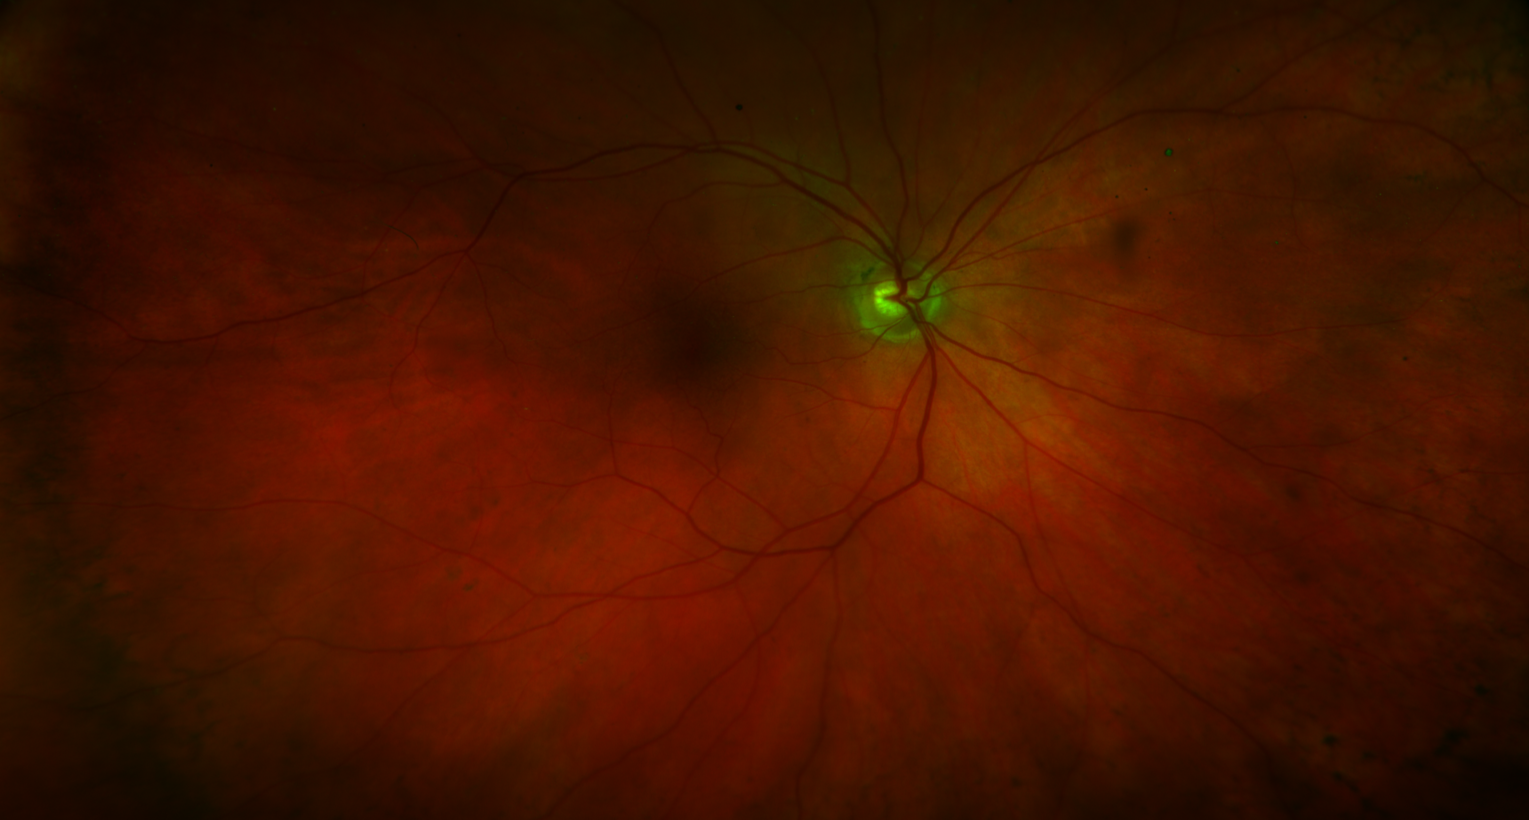

In [11]:
img.from_array(image_array[:,:,:])